# Our revision on day 3

In [1]:
1+1

2

## Basics of Python

### Lists

In [2]:
names = ['John', 'Banda', 'Adam']

In [3]:
names[-1]

'Adam'

In [4]:
names[0]

'John'

In [6]:
names[0:2]

['John', 'Banda']

In [8]:
['Hello, '+ x1 for x1 in names]

['Hello, John', 'Hello, Banda', 'Hello, Adam']

We can uderstand this with a loop

In [9]:
res=[]
for x1 in names:
    res.append('Hello, ' + x1)
res
    

['Hello, John', 'Hello, Banda', 'Hello, Adam']

In [10]:
xvals = range(100)

We are calculating x**2+6*x+2 as yvals

In [11]:
yvals = [x**2+6*x+2 for x in xvals]

Now let's plot the result

In [17]:
import matplotlib.pyplot as plt

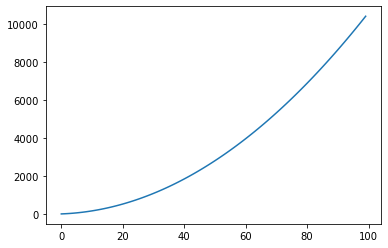

In [18]:
plt.plot(xvals,yvals)

In [19]:
import pandas as pd

In [36]:
df = pd.DataFrame({"xv": xvals, "yv": yvals})

In [37]:
df

,xv,yv
0,0,2
1,1,9
2,2,18
3,3,29
4,4,42
...,...,...
95,95,9597
96,96,9794
97,97,9993
98,98,10194


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='xv', ylabel='yv'>

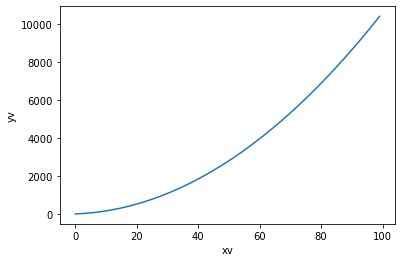

In [38]:
sns.lineplot(data=df, x='xv', y='yv')

### Now let's plot a standard dataset (one that comes with the library)

In [39]:
tips = sns.load_dataset("tips")

In [40]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


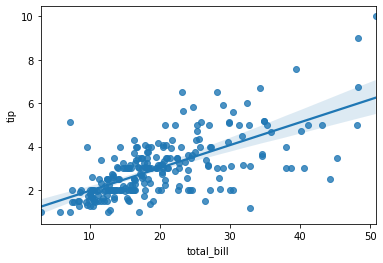

In [41]:
sns.regplot(x="total_bill", y="tip", data=tips);

### Dictonaries

In [43]:
names = ['John', 'Banda', 'Adam']

In [44]:
names[0]

'John'

In [46]:
ages={'John':55, 'Banda':23, 'Adam': 44}

In [47]:
ages['John']

55

In [48]:
ages['Adam']

44

In [49]:
people={'John':['M', 55, 'Delft'], 'Banda':['M', 35, 'Delft'], 'Adam': ['M', 25, 'Delft']}

In [50]:
people['John']

['M', 55, 'Delft']

In [51]:
people={'John':{'Sex':'M', 'Age': 55, 'Place': 'Delft'}, 'Banda':{'Sex':'M', 'Age': 35, 'Place': 'Delft'}, 'Adam': {'Sex':'M', 'Age': 45, 'Place': 'Hague'}}

In [52]:
people['John']

{'Sex': 'M', 'Age': 55, 'Place': 'Delft'}

In [53]:
people['John']['Sex']

'M'

In [54]:
import wntr

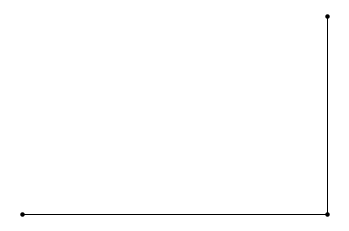

In [55]:
wn = wntr.network.WaterNetworkModel()
wn.add_pattern('pat1', [1])
wn.add_pattern('pat2', [1,2,3,4,5,6,7,8,9,10])
wn.add_junction('node1', base_demand=0.01, demand_pattern='pat1', elevation=100,
     coordinates=(1,2))
wn.add_junction('node2', base_demand=0.02, demand_pattern='pat2', elevation=50,
    coordinates=(1,3))
wn.add_pipe('pipe1', 'node1', 'node2', length=304.8, diameter=0.3048,
   roughness=100, minor_loss=0.0, initial_status='OPEN')
wn.add_reservoir('res', base_head=125, head_pattern='pat1', coordinates=(0,2))
wn.add_pipe('pipe2', 'node1', 'res', length=100, diameter=0.3048, roughness=100,
     minor_loss=0.0, initial_status='OPEN')
ax = wntr.graphics.plot_network(wn)

In [61]:
wn.write_inpfile("test.inp")
wn = wntr.network.WaterNetworkModel('Net3LPS.inp') 
wn.options.hydraulic.demand_model = 'DD'
sim = wntr.sim.EpanetSimulator(wn)
results=sim.run_sim()

### Results are returned as a dictionary

Let's get the keys

In [70]:
results.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

In [69]:
results.node['demand']

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,0.0,0.039116,0.0,0.103279,0.0,0.0,0.0,0.0,0.0,0.016059,...,0.0,0.0,0.0,0.0,0.0,-0.830136,0.000000,0.029043,-0.020769,0.141721
3600,0.0,0.039116,0.0,0.107632,0.0,0.0,0.0,0.0,0.0,0.023249,...,0.0,0.0,0.0,0.0,0.0,-0.824089,-0.216728,0.062875,-0.019413,0.191673
7200,0.0,0.039116,0.0,0.108452,0.0,0.0,0.0,0.0,0.0,0.017497,...,0.0,0.0,0.0,0.0,0.0,-0.818417,-0.210107,0.078844,0.008373,0.228372
10800,0.0,0.039116,0.0,0.108452,0.0,0.0,0.0,0.0,0.0,0.017257,...,0.0,0.0,0.0,0.0,0.0,-0.815752,-0.208697,0.074248,0.010390,0.226244
14400,0.0,0.039116,0.0,0.112995,0.0,0.0,0.0,0.0,0.0,0.009108,...,0.0,0.0,0.0,0.0,0.0,-0.806913,-0.198094,0.100969,0.035917,0.283996
18000,0.0,0.022712,0.0,0.114761,0.0,0.0,0.0,0.0,0.0,0.011025,...,0.0,0.0,0.0,0.0,0.0,-0.489026,-0.206931,0.030009,0.015657,-0.030090
21600,0.0,0.022712,0.0,0.112111,0.0,0.0,0.0,0.0,0.0,0.010186,...,0.0,0.0,0.0,0.0,0.0,-0.484720,-0.205678,0.032103,0.016714,0.054851
25200,0.0,0.000000,0.0,0.116212,0.0,0.0,0.0,0.0,0.0,0.012823,...,0.0,0.0,0.0,0.0,0.0,-0.483577,-0.207558,0.016952,0.007903,0.053266
28800,0.0,0.000000,0.0,0.114509,0.0,0.0,0.0,0.0,0.0,0.011505,...,0.0,0.0,0.0,0.0,0.0,-0.481467,-0.206037,0.022452,0.010767,0.062234
32400,0.0,0.000000,0.0,0.115140,0.0,0.0,0.0,0.0,0.0,0.013182,...,0.0,0.0,0.0,0.0,0.0,-0.486874,-0.207639,0.001394,0.004600,-0.048812


In [75]:
dem=results.node['demand']

In [76]:
dem.max()

name
10       0.000000
15       0.039116
20       0.000000
35       0.117095
40       0.000000
           ...   
River   -0.481467
Lake     0.000000
1        0.100969
2        0.035917
3        0.283996
Length: 97, dtype: float32

In [77]:
dem.max().max()

0.2929278016090393

What is the maximum flow rate from the river?
Let's do this by finding maximum flow in pipe 60 (not the only way)

In [80]:
results.link.keys()

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])

In [81]:
fl60=results.link['flowrate']['60']

In [82]:
fl60

0        0.830136
3600     0.824089
7200     0.818417
10800    0.815752
14400    0.806913
18000    0.489026
21600    0.484720
25200    0.483577
28800    0.481467
32400    0.486874
36000    0.487772
39600    0.489577
43200    0.490919
46800    0.491979
50400    0.492698
54000    0.500320
57600    0.501880
61200    0.504203
64800    0.506109
68400    0.508232
72000    0.511702
75600    0.515138
79200    0.832256
82800    0.833150
86400    0.825679
Name: 60, dtype: float32

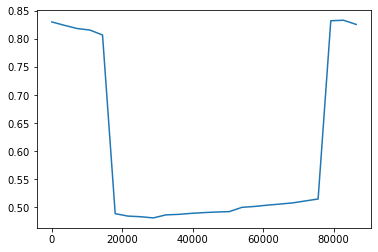

In [83]:
plt.plot(fl60)

In [84]:
fl60.max()

0.833150327205658

In [86]:
fl60.idxmax()/3600

23.0

## Sensitivity Analysis

Let's take the impact of the diamter of pipe id '137' on the minimum pressure occuring at node '131'. And plot it. 

In [110]:
def runSet(diameter=.040):
    wn = wntr.network.WaterNetworkModel('Net3LPS.inp') 
    wn.options.hydraulic.demand_model = 'DD'
    p137=wn.get_link('137')
    #print(p137.diameter)
    p137.diameter=diameter
    #print(p137.diameter)
    sim = wntr.sim.EpanetSimulator(wn)
    results=sim.run_sim()
    mp= results.node['pressure']['131'].min()
    
    return mp

runSet(diameter=.050)

  

-284.8741760253906

In [111]:
import numpy as np

In [112]:
dias=np.arange(600,50,-5)

In [113]:
ps=[ runSet(d) for d in dias]

In [99]:
min(ps)

46.45880126953125